## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Garmmar Clustering

In [2]:
data = pd.read_csv('FYP_ML_example.csv')

user_data = pd.read_csv('user_predict.csv')

frames = [data,user_data]
result = pd.concat(frames,ignore_index=True, sort=False)
result

,Name,Word count,EstSpeechTime,Gar_mistake,Totalmention,GoodPoint,Average_Similar,Greatest_Similar,avgSentScore,maxSentScore,Ques_good,Ques_men
0,ben,169,78.000000,2,10,4,0.54400,0.866000,0.547654,0.732135,6,12
1,lily,134,61.846154,5,6,2,0.31200,0.698000,0.535647,0.632163,6,18
2,john,160,73.846154,6,2,5,0.28800,0.845000,0.713154,0.943163,17,30
3,jason,165,76.153846,10,3,1,0.51600,0.790000,0.493217,0.612315,11,24
4,mary,180,83.076923,15,6,9,0.26400,0.563000,0.614651,0.863217,14,20
5,marco,174,80.307692,1,4,4,0.43400,0.535000,0.645465,0.873135,34,52
6,tommy,150,69.230769,3,2,3,0.79700,0.884000,0.754654,0.916547,20,26
7,Kim,140,64.615385,7,5,5,0.30100,0.436000,0.593213,0.795642,9,50
8,Jim,168,77.538462,9,5,7,0.72100,0.925000,0.633547,0.753216,10,13
9,Yim,200,92.307692,12,7,1,0.67200,0.684000,0.703255,0.893216,19,41


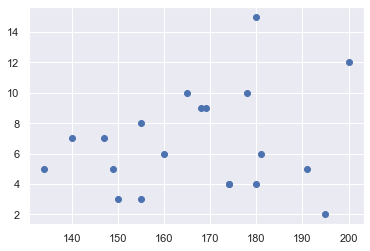

In [5]:
plt.scatter(data['Word count'],data['Gar_mistake'])

plt.show()

In [3]:
from sklearn.preprocessing import MinMaxScaler
x = result.iloc[:,[1,3]]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
print(scaled)

[[0.53030303 0.07142857]
 [0.         0.28571429]
 [0.39393939 0.35714286]
 [0.46969697 0.64285714]
 [0.6969697  1.        ]
 [0.60606061 0.        ]
 [0.24242424 0.14285714]
 [0.09090909 0.42857143]
 [0.51515152 0.57142857]
 [1.         0.78571429]
 [0.31818182 0.5       ]
 [0.66666667 0.64285714]
 [0.1969697  0.42857143]
 [0.92424242 0.07142857]
 [0.6969697  0.21428571]
 [0.71212121 0.35714286]
 [0.86363636 0.28571429]
 [0.60606061 0.21428571]
 [0.22727273 0.        ]
 [0.31818182 0.14285714]
 [0.63636364 0.42857143]]


In [7]:
wcss = []
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[6725.619047619048,
 2087.0384615384614,
 1084.9333333333334,
 714.0999999999999,
 468.2261904761905,
 353.2,
 292.3666666666667,
 250.33333333333334,
 208.99999999999997,
 196.33333333333331]

Text(0, 0.5, 'SSE')

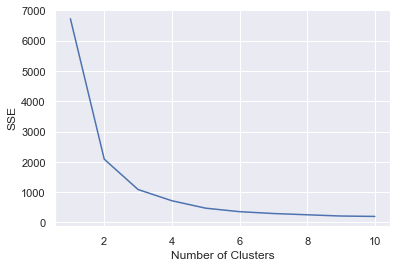

In [8]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

In [6]:
kmeans = KMeans(n_clusters=5, init="k-means++")
y_kmeans = kmeans.fit_predict(scaled)
y_kmeans
centers = kmeans.cluster_centers_


In [7]:
pd.concat([result,pd.DataFrame(y_kmeans)], axis=1)

,Name,Word count,EstSpeechTime,Gar_mistake,Totalmention,GoodPoint,Average_Similar,Greatest_Similar,avgSentScore,maxSentScore,Ques_good,Ques_men,0
0,ben,169,78.000000,9,10.0,4.0,0.54400,0.866000,0.547654,0.732135,6.0,12.0,3
1,lily,134,61.846154,5,6.0,2.0,0.31200,0.698000,0.535647,0.632163,6.0,18.0,2
2,john,160,73.846154,6,2.0,5.0,0.28800,0.845000,0.713154,0.943163,17.0,30.0,2
3,jason,165,76.153846,10,3.0,1.0,0.51600,0.790000,0.493217,0.612315,11.0,24.0,3
4,mary,180,83.076923,15,6.0,9.0,0.26400,0.563000,0.614651,0.863217,14.0,20.0,1
5,marco,174,80.307692,4,4.0,4.0,0.43400,0.535000,0.645465,0.873135,34.0,52.0,0
6,tommy,150,69.230769,3,2.0,3.0,0.79700,0.884000,0.754654,0.916547,20.0,26.0,2
7,Kim,140,64.615385,7,5.0,5.0,0.30100,0.436000,0.593213,0.795642,9.0,50.0,2
8,Jim,168,77.538462,9,5.0,7.0,0.72100,0.925000,0.633547,0.753216,10.0,13.0,3
9,Yim,200,92.307692,12,7.0,1.0,0.67200,0.684000,0.703255,0.893216,19.0,41.0,1


Text(0, 0.5, 'Grammar Mistake')

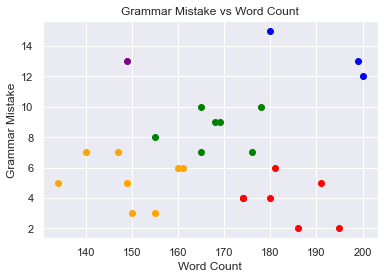

In [9]:
plt.scatter(x.values[y_kmeans==0,0], x.values[y_kmeans==0,1],  c="red")
plt.scatter(x.values[y_kmeans==1,0], x.values[y_kmeans==1,1],  c="blue")
plt.scatter(x.values[y_kmeans==2,0], x.values[y_kmeans==2,1],  c="orange")
plt.scatter(x.values[y_kmeans==3,0], x.values[y_kmeans==3,1],  c="green")
plt.scatter(x.values[y_kmeans==4,0], x.values[y_kmeans==4,1],  c="purple")
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("Grammar Mistake vs Word Count") 
plt.xlabel('Word Count') 
plt.ylabel('Grammar Mistake') 

In [16]:
kmeans = KMeans(5)
kmeans.fit(x)


KMeans(n_clusters=5)

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 1, 0, 0, 3, 1, 2, 4, 0, 4])

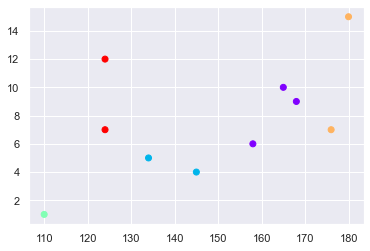

In [18]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Word count'],data_with_clusters['Gar_mistake'],c=data_with_clusters['Clusters'],cmap='rainbow')

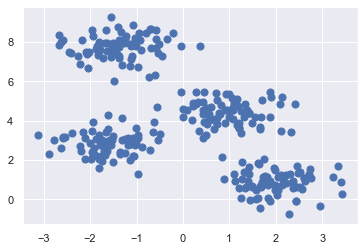

In [24]:
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

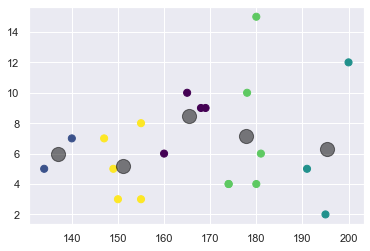

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
plt.scatter(x.values[:, 0], x.values[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 3)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 610767147  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0


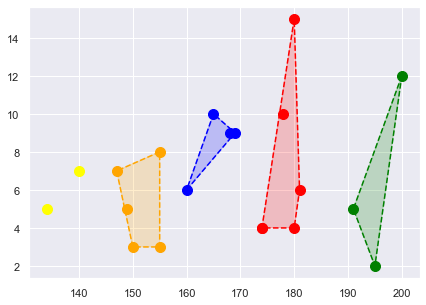

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

def drawclusters(ax):
    for i in range(ncluster):
        points = x[y == i]
        ax.scatter(points.values[:, 0], points.values[:, 1], s=100, c=col[i], label=f'Cluster {i + 1}')
        hull = ConvexHull(points)
        vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
        ax.plot(points.values[vert, 0], points.values[vert, 1], '--', c=col[i])
        ax.fill(points.values[vert, 0], points.values[vert, 1], c=col[i], alpha=0.2)
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='x')

col = ['blue', 'green','orange','red','yellow']
ncluster = 5
kmeans = KMeans(n_clusters=ncluster, max_iter=500).fit(x)
y = kmeans.labels_
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(1, figsize=(7, 5))
drawclusters(ax)
ax.legend()
plt.tight_layout()
plt.show()